## Контрольная работа №5

### Снопов Павел, 2 курс, 5 группа, КИМ №86

In [1]:
import sympy as sp
sp.init_printing()

#### Номер 1

In [2]:
Volume, X, Speed, t, k = sp.symbols('Volume, X, Speed, t, k')  #Volume - объем соли; X - общий объем
X = 10*Volume


#### Номер 2

In [39]:
x, y = sp.symbols("x,y")

In [40]:
Eq1 = sp.Eq(x**2-4*y-y**2+8)
Eq2 = sp.Eq(x*y,4)
Eq3 = sp.Eq(y,x+3)
Eq1

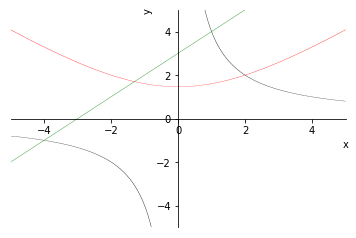

In [41]:
plots = sp.plot_implicit(Eq1, show = False, line_color = "red")
plots.append(sp.plot_implicit(Eq2, show = False, line_color = "black")[0])
plots.append(sp.plot_implicit(Eq3, show = False, line_color = "green")[0])
plots.show()

Запишем функции, составленные из приведенных выше уравнений:

In [6]:
f = sp.Function("f", real = True)(x)  #соответствует Eq1 - red
f = sp.sqrt(x**2+4) + 2 
g = sp.Function("g", real = True)(x)  #соответствует Eq2 - black
g = 4/x
h = sp.Function("h", real = True)(x)  #соответствует Eq3 - green
h = x+3

Найдем точки пересечения функций:

In [7]:
points1 = sp.solve([Eq1,Eq2], (x,y))[0]  #red-black
points1

In [8]:
points2 = sp.solve([Eq2,Eq3], (x,y))[1]  #black-green
points2

In [9]:
points3 = sp.solve([Eq1,Eq3], (x,y))[0]  #red-green
points3

In [43]:
Int = sp.integrate(h, (x,points3[0], points2[0])) - sp.integrate(f, (x,points3[0], points2[0]))  #1-ая область
Int += sp.integrate(g, (x, points2[0], points1[0])) - sp.integrate(f, (x,points2[0], points1[0]))  #2-ая область
Int.simplify().evalf()

#### Номер 3

In [127]:
x,y,a,b,c,d,t,p  = sp.symbols('x,y,a,b,c,d,t,p')

Запишем уравнения прямых, площадь пересечения которых надо найти:

In [128]:
lines = [sp.Eq(x+y,a), sp.Eq(x+y,b), sp.Eq(y/x,c), sp.Eq(y/x,d)]
lines

Обозначим переменные, через которые заменим $x$ и $y$

In [129]:
variables = [t,p]

Выражаем $x$ и $y$ через новые переменные

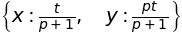

In [136]:
conds = [sp.Eq(x+y,t),sp.Eq(y/x,p)]
sol = sp.solve(conds,(x,y))
sol

Задаем матрицу и считаем якобиан

In [140]:
sp.Matrix(list(sol.values())[::-1])

⎡  t  ⎤
⎢─────⎥
⎢p + 1⎥
⎢     ⎥
⎢ p⋅t ⎥
⎢─────⎥
⎣p + 1⎦

In [143]:
sp.Matrix(list(sol.values())[::-1]).jacobian(sp.Matrix(variables))

⎡  1           -t         ⎤
⎢─────       ────────     ⎥
⎢p + 1              2     ⎥
⎢            (p + 1)      ⎥
⎢                         ⎥
⎢  p        p⋅t        t  ⎥
⎢─────  - ──────── + ─────⎥
⎢p + 1           2   p + 1⎥
⎣         (p + 1)         ⎦

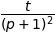

In [146]:
J = sp.det(sp.Matrix(list(sol.values())[::-1]).jacobian(sp.Matrix(variables)))
J = J.simplify()
J  #Якобиан

В новой системе координат берем кратный интеграл от якобиана по новым переменных в указанных пределах

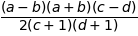

In [145]:
sp.integrate(J,(t,a,b),(p,c,d)).factor()